In [15]:
import speech_recognition as sr
import pyttsx3
import librosa
import os
import nltk
from pydub.silence import split_on_silence
from pydub import audio_segment
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn import decomposition, svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#initalize the voice recognizer
encode = encoder(["mama tipp topp tiptop tip top 50 tack krusbär basketspelare"])
r = sr.Recognizer()

#load in audiofile
file= sr.AudioFile( 'tal\oskar_tal_0_1.wav')

#record sound from file with recognizer
with file as source:
    audio = r.record(source)

#use googles text to speech to get text
text = r.recognize_google(audio,show_all=True)['alternative'][0]
print(text['transcript'])
vector = encode.transform([text['transcript']])
encoded_text = vector.toarray()[0]
#print results
print(text)
print(encoded_text)
print("Speech from audio: " + text['transcript'])
print("Accuracy: " +str(text['confidence']))

NameError: name 'encoder' is not defined

In [3]:


'''Functions to detect different conditons in speech'''

# Create a recognizer instance

# Define a function to count the number of pauses in the speech
def count_pauses(file):
    # Split the audio into chunks
    sound = audio_segment.AudioSegment.from_wav(file)
    chunks = split_on_silence(sound, min_silence_len=500, silence_thresh=-40)
    # Count the number of chunks
    num_chunks = len(chunks)
    # Return the number of pauses
    return num_chunks - 1

# Define a function to count the number of repetitions in the speech
def count_repetitions(text):
    # Split the text into words
    words = text.split()
    # Count the number of repetitions
    num_repetitions = 0
    for i in range(len(words)-1):
        if words[i] == words[i+1]:
            num_repetitions += 1
    # Return the number of repetitions
    return num_repetitions


# Define a function to detect signs of aphasia
def detect_aphasia(text):
    # Load a database of common words and phrases
    common_words = ["mama", 'tipp','topp','tiptop', "tip", "top", "50","tack", "krusbär", "basketspelare"]
    # Split the text into words
    words = text.split()
    # Check for any word substitutions or word-finding difficulties
    for word in words:
        if word.lower() not in common_words:
            print(word)
            return True
    # No signs of aphasia detected
    return False

# Define a function to detect signs of babbling, work in progress
def detect_babbling(text):
    # Split the text into words
    words = text.split()
    # Count the number of nonsensical or repetitive sounds
    num_babbles = 0
    for word in words:
        if word.lower() in ["uh", "um", "ah", "uhh", "umm", "ahh", "babble", "gaga", "goo", "gurgling", "cooing"]:
            num_babbles += 1
    # Return True if there are more than 2 nonsensical or repetitive sounds
    return num_babbles > 2

# Define a function to detect signs of stuttering
def detect_stuttering(text):
    # Split the text into words
    words = nltk.word_tokenize(text)
    # Count the number of repetitions or prolongations
    num_stutters = 0
    for i in range(len(words)-1):
        if len(words[i]) > 1:
            if words[i][0].isalpha() and words[i][1].isalpha() and words[i][0].lower() == words[i][1].lower():
                num_stutters += 1
    # Return True if there are more than 2 repetitions or prolongations
    return num_stutters > 2


def encoder(text):
    vectorizer = CountVectorizer()
    vectorizer.fit(text)    
    return vectorizer


# Transcribe the audio file
# with audio_file as source:
#     audio = r.record(source)
#     text = r.recognize_google(audio)
# print(text)
# # Count the number of pauses and repetitions
# num_pauses = count_pauses(audio)
# num_repetitions = count_repetitions(text)

# # Detect signs of aphasia and babbling
# has_aphasia = detect_aphasia(text)
# has_babbling = detect_babbling(text)
# has_stuttering = detect_stuttering(text)

# # Print the results
# print("Number of pauses:", num_pauses)
# print("Number of repetitions:", num_repetitions)

# if has_babbling:
#     print("Signs of babbling detected.")
# else:
#     print("No signs of babbling detected.")
# if has_stuttering:
#     print("Signs of stuttering")


In [4]:
speech_data = []
encode = encoder(["mama tipp topp tiptop tip top 50 tack krusbär basketspelare"])

for file in os.listdir(r'C:\Users\oskar\Documents\repo\stroke-video-analysis\tal'):
    data = []
    r = sr.Recognizer()
    print('Processing: ' + file + '...')
    # Load the audio file
    audio_file = sr.AudioFile('tal\\' + file)

    with audio_file as source:
        audio = r.record(source)
        try:
            text = r.recognize_google(audio,show_all = True, language="sv-SE")['alternative'][0]
            
            vector = encode.transform([text['transcript']])
            v = vector.toarray()[0]
            data = v.tolist()
            data.append(float(text['confidence']))
            text = text['transcript']
            print(text)
        except:
            text = "incoherent"
            vector = encode.transform([text])
            v = vector.toarray()[0]
            data = v.tolist()
            data.append(0)
            print('incoherent or no speech')
    data.append(count_pauses("tal\\" + file))
    # data.append(detect_aphasia(text))
    # data.append(count_repetitions(text))
    print("num of pauses:" + str(count_pauses("tal\\" + file)))
    print("Aphasia:" + str(detect_aphasia(text)))
    print("Repetitions:" + str(count_repetitions(text)))
    print(vector.toarray()[0])
    speech_data.append(data)
    print(len(data))

Processing: Andrei_tal_0_1.wav...
mamma Tip Top 50 50 tack krusbär basketspelare
num of pauses:3
mamma
Aphasia:True
Repetitions:1
[2 1 1 0 1 1 0 0 1 0]
12
Processing: Andrei_tal_0_2.wav...
mamma Tip Top 50 50 tack krusbär basketspelare
num of pauses:4
mamma
Aphasia:True
Repetitions:1
[2 1 1 0 1 1 0 0 1 0]
12
Processing: Andrei_tal_0_3.wav...
mamma Tip Top 50 50 krusbär basketspelare
num of pauses:1
mamma
Aphasia:True
Repetitions:1
[2 1 1 0 0 1 0 0 1 0]
12
Processing: Andrei_tal_0_4.wav...
mamma Tip Top 50 50 tack krusbär basketspelare
num of pauses:5
mamma
Aphasia:True
Repetitions:1
[2 1 1 0 1 1 0 0 1 0]
12
Processing: Andrei_tal_0_5.wav...
mamma Tip Top 50 50 tack krusbär basketspelare
num of pauses:4
mamma
Aphasia:True
Repetitions:1
[2 1 1 0 1 1 0 0 1 0]
12
Processing: Andrei_tal_1_1.wav...
ac55 till suck krusbär basketspelare
num of pauses:7
ac55
Aphasia:True
Repetitions:0
[0 1 1 0 0 0 0 0 0 0]
12
Processing: Andrei_tal_1_2.wav...
mamma tiptop han till Chuck Vad ska jag spela det
nu

In [5]:
l = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
label = []
for i in range(4):
    label += l

print(speech_data)
X_train, X_test, y_train, y_test = train_test_split(
    speech_data, label, test_size=0.3
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
# y_train = tf.keras.utils.to_categorical(np.asarray(y_train))
# y_test = tf.keras.utils.to_categorical(np.asarray(y_test))
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
print(len(y_train))



[[2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0.80843651, 3], [2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0.81031889, 4], [2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0.63457328, 1], [2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0.78954417, 5], [2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0.81034231, 4], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0.55167931, 7], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0.6354326, 8], [2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.47007, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.72648519, 7], [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0.83866692, 9], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.28264475, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.67521346, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0.78046268, 3], [2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0.78152627, 4], [2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0.81964254, 2], [2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0.76612759, 2], [2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0.71813399, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.72675449, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.85391259, 

In [6]:
model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
model.compile(optimizer='adam', loss= tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

result = model.fit(X_train, y_train, epochs = 10, batch_size=10, validation_data = (X_test,y_test))

Epoch 1/10


C:\Users\oskar\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


5/5 [==============================] - 1s 36ms/step - loss: 0.7068 - accuracy: 0.4286 - val_loss: 0.6628 - val_accuracy: 0.7778
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 0.6450 - accuracy: 0.8333 - val_loss: 0.6028 - val_accuracy: 0.9444
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.5966 - accuracy: 1.0000 - val_loss: 0.5528 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.5522 - accuracy: 1.0000 - val_loss: 0.5039 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 0.5036 - accuracy: 1.0000 - val_loss: 0.4489 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 0.4520 - accuracy: 1.0000 - val_loss: 0.3888 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 0.3958 - accuracy: 1.0000 - val_loss: 0.3303 - val_accuracy: 1.0000
Epoch 8/10
5/5 [============================

In [8]:
score = model.evaluate(X_test, y_test, verbose=0)
test = np.round(model.predict(X_test))
print('Test loss:', score[0])
print('Test accuracy:', score[1])
report = accuracy_score(y_test,test)
nn_score = classification_report(y_test,test)
print(report)
print(nn_score)

Test loss: 0.1821315437555313
Test accuracy: 1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [9]:
'''support vector machine'''
rbf = svm.SVC(kernel='poly', gamma=0.5, C=0.1).fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)
svm_score = classification_report(y_test,rbf_pred)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print(svm_score)

Accuracy (RBF Kernel):  100.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



c:\Users\oskar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[ 8  0]
 [ 0 10]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


c:\Users\oskar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


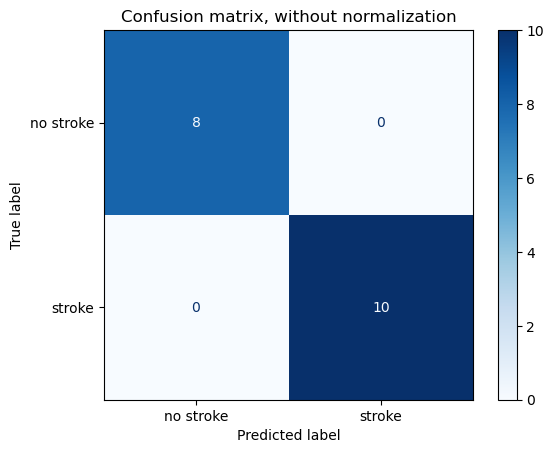

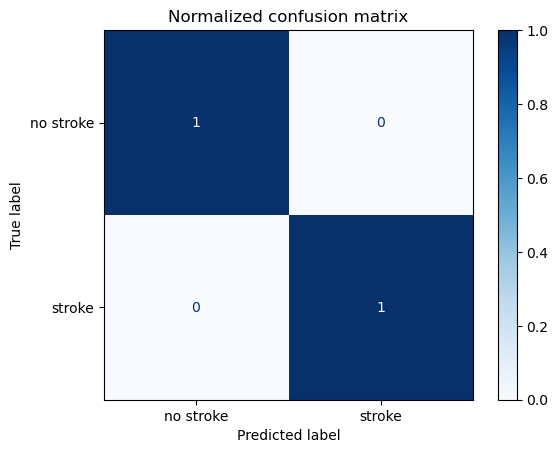

In [16]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["no stroke","stroke"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rbf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [10]:
'''AdaBoost'''
adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 10),
    n_estimators = 200
)
adaboost.fit(X_train, y_train)
ada_pred = adaboost.predict(X_test)
ada_score = classification_report(y_test,ada_pred)
ada_accuracy = accuracy_score(y_test, ada_pred)
print('Accuracy (AdaBoost): ', "%.2f" % (ada_accuracy*100))
print(ada_score)

Accuracy (AdaBoost):  94.44
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18

